# Final Project on Supervised Learning

### LAN and WAN Response Analysis 
- Description: The source of our data comes from the variablity of a LAN network when it is connecting to the Internet. The data is collected by the ping response time from the devices of the local internet router and to the first-hop server on the internet.
- Group Members: Eric Topmiller, Viphu Nguyen, David Gigremosa, Paul Rozario

Question to Answer: What is the worst time of day for ping response with ethernet and wireless for both LAN and WAN?

In [ ]:

# Import libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from datetime import datetime
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Set the dataset from the network csv
df = pd.read_csv('ping_data.csv')
df.head()

,timestamp,location,source,local_dest,local_avg,remote_dest,remote_avg
0,1559040909,lower-level,wireless,192.168.0.1,4.39,142.254.217.53,9.09
1,1559040920,lower-level,wireless,192.168.0.1,0.49,142.254.217.53,16.75
2,1559040930,lower-level,wireless,192.168.0.1,0.56,142.254.217.53,8.31
3,1559040940,lower-level,wireless,192.168.0.1,1.64,142.254.217.53,9.40
4,1559040950,lower-level,wireless,192.168.0.1,1.18,142.254.217.53,9.07


### Data Wrangling and Filtering the Data
- Done by Viphu Nguyen

In [ ]:
# Finding the missing values from the ping dataset
df.isna().sum()

timestamp      0
location       0
source         0
local_dest     0
local_avg      0
remote_dest    0
remote_avg     0
dtype: int64

In [ ]:
# Duplicate the dataframe in case of crashes
df1 = df.copy()

In [ ]:
# Removing unncessary columns from the ping dataset
df1 = df1.drop(['location', 'local_dest', 'remote_dest'], axis = 1)
df1

,timestamp,source,local_avg,remote_avg
0,1559040909,wireless,4.39,9.09
1,1559040920,wireless,0.49,16.75
2,1559040930,wireless,0.56,8.31
3,1559040940,wireless,1.64,9.40
4,1559040950,wireless,1.18,9.07
...,...,...,...,...
72458,1559690659,wireless,0.83,7.85
72459,1559690670,wireless,0.84,8.88
72460,1559690680,wireless,5.73,10.92
72461,1559690690,wireless,0.19,10.00


#### *Each header definition*
- Timestamp: The current time of an event that is recorded
- Source: Network Source
- Local_avg: Response Time for local network (ms)
- Remote_avg: Response time for remote network (ms)

In [ ]:
# Group up the dataset by the local_avg (response time)
group_local = df1.groupby('local_avg').groups
group_local.head(1000)
# not working

AttributeError: 'PrettyDict' object has no attribute 'head'

In [ ]:
# Convert the timestamp to datetime object
df1['timestamp'] = pd.to_datetime(df1['timestamp'], unit='ms', errors='coerce')
df1

,timestamp,location,source,local_dest,local_avg,remote_dest,remote_avg
0,1970-01-19 01:04:00.909,lower-level,wireless,192.168.0.1,4.39,142.254.217.53,9.09
1,1970-01-19 01:04:00.920,lower-level,wireless,192.168.0.1,0.49,142.254.217.53,16.75
2,1970-01-19 01:04:00.930,lower-level,wireless,192.168.0.1,0.56,142.254.217.53,8.31
3,1970-01-19 01:04:00.940,lower-level,wireless,192.168.0.1,1.64,142.254.217.53,9.40
4,1970-01-19 01:04:00.950,lower-level,wireless,192.168.0.1,1.18,142.254.217.53,9.07
...,...,...,...,...,...,...,...
72458,1970-01-19 01:14:50.659,lower-level,wireless,192.168.0.1,0.83,142.254.217.53,7.85
72459,1970-01-19 01:14:50.670,lower-level,wireless,192.168.0.1,0.84,142.254.217.53,8.88
72460,1970-01-19 01:14:50.680,lower-level,wireless,192.168.0.1,5.73,142.254.217.53,10.92
72461,1970-01-19 01:14:50.690,lower-level,wireless,192.168.0.1,0.19,142.254.217.53,10.00


In [ ]:
df1['Date'] = df1['timestamp'].apply(lambda x: datetime.fromtimestamp(x))
df1

TypeError: an integer is required (got type Timestamp)

### Data Visualizations 
- Done by Viphu Nguyen

array([[<AxesSubplot:title={'center':'local_avg'}>]], dtype=object)

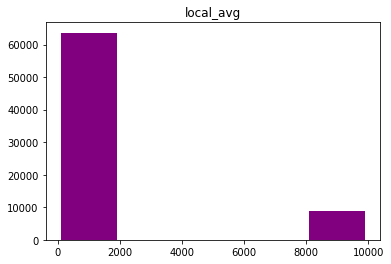

In [ ]:
# Histogram for 'local_avg' response time (local) column
df1.hist(column='local_avg', bins=5, grid=False, rwidth=.9, color='purple')

Analysis: The histogram tells us that the the response time (ms) is estimated largely between 0 to 2,000 while there is a fewer amount at closer to 10,000 frequency for the response time between 8,000 to 10,000

### Use scikit-learn for Logistic Regression and DecisionTree Classification, XGBoost, Keras, Pytorch to train, test and predict a categorical variable. Use appropriate metric and interpret themeaning of the score

### Decision Tree
- Done by Viphu Nguyen

In [ ]:
# Duplicate the dataframe in case of crashes
df1 = df.copy()

In [ ]:
X = df1.drop(['location', 'source', 'local_dest', 'remote_dest'], axis = 1)
y = df1['local_dest']

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2,random_state=99)

clf = DecisionTreeClassifier(criterion='entropy', random_state=99)

In [ ]:
clf.fit(X_train,y_train)
y_pred= clf.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

##### Plot a Decision Tree

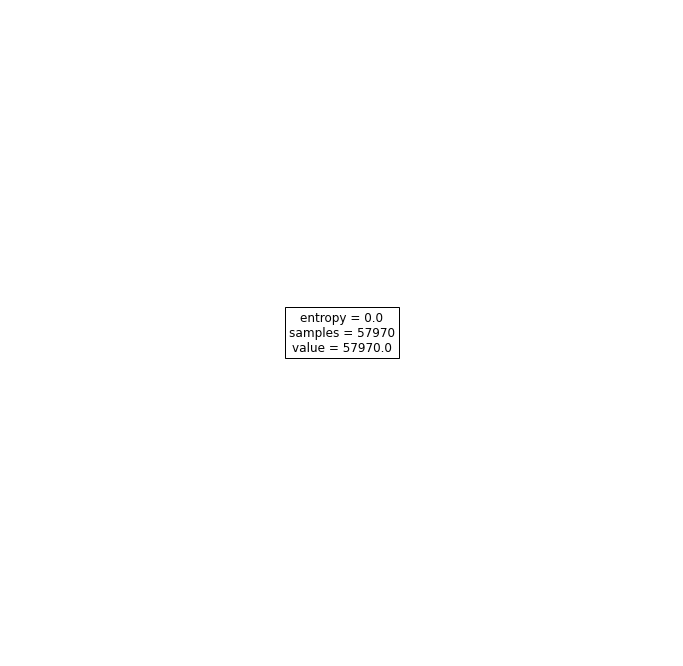

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(decision_tree=clf, max_depth= 3,fontsize=12);

###  Show feature importance in XGBoost by using xgb.plot.importance

### Compare the results of the algorithms (comparison, conclusion, challenges...etc.)

### Outcome of our analysis